Классификация — это один из ключевых типов задач машинного обучения, в
котором модель обучается предсказывать категорию или класс для каждого примера. В
отличие от регрессии, где результат является непрерывным числом, в классификации
результат всегда дискретный — это одна из заранее определённых категорий.

Суть классификации

Классификация работает по принципу: на основе известных признаков модель
определяет, к какому классу относится объект. Эти классы заранее определены, поэтому
задача модели — научиться проводить границу между ними.

Пример из реальной жизни — решение задачи «спам или не спам» для электронной
почты. Программа анализирует текст письма, наличие определённых слов, ссылки и
прочие параметры, а затем относит письмо к категории «Спам» или «Не спам».

Виды классификации

Классификация бывает двух основных видов:
Бинарная классификация — предсказание одного из двух классов.
Примеры:
- Спам или не спам
- Болен пациент или здоров
Многоклассовая классификация — предсказание одного из нескольких классов.
Примеры:
- Определение породы собаки по фото
- Распознавание рукописных цифр (0, 1, 2 … 9)

Как работает классификация

Процесс классификации проходит в три этапа:
1. Обучение: модель изучает закономерности на размеченных данных (где известны и
признаки, и классы).
2. Предсказание: модель применяет полученные знания для новых данных.
3. Оценка качества: проверяется, насколько точно модель классифицирует новые
примеры.

Алгоритмы классификации

Для задач классификации существует множество алгоритмов. Рассмотрим некоторые из наиболее популярных:
- Логистическая регрессия (Logistic Regression) — эффективна для бинарной
классификации.
- Метод k-ближайших соседей (K-Nearest Neighbors, KNN) — классифицирует объект по
классу его ближайших соседей.
- Решающие деревья (Decision Trees) — строят дерево решений на основе признаков.
- Случайный лес (Random Forest) — объединяет несколько деревьев решений для более
точных предсказаний.
- Метод опорных векторов (Support Vector Machines, SVM) — находит оптимальную границу
между классами.
- Наивный байесовский классификатор (Naive Bayes) — эффективен для анализа текстов
(например, спама).

Оценка качества классификации

Важно не только обучить модель, но и понять, насколько она эффективна. Для
этого используются метрики:
- Accuracy (Точность) — доля правильно угаданных примеров.
- Precision (Точность класса) — насколько точны предсказания положительного класса.
- Recall (Полнота) — сколько положительных примеров модель нашла.
- F1-score — баланс между точностью и полнотой.

Пример применения в реальной жизни:

- В медицине: Классификация опухолей как доброкачественных или злокачественных.
- В финансах: Определение мошеннических транзакций.
- В безопасности: Распознавание лиц и идентификация нарушителей.
- В маркетинге: Классификация отзывов клиентов как положительных или отрицательны

Пример 1. Определение спама

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import pandas as pd

In [4]:
# Пример данных о письмах
data = {
"Текст": [
"Купите дешевый товар сейчас",
"Ваш заказ подтвержден",
"Поздравляем, вы выиграли приз",
"Ваш отчёт готов",
"Нажмите, чтобы получить бонус"
],
"Спам": [1, 0, 1, 0, 1] # 1 — спам, 0 — не спам
}
df = pd.DataFrame(data)

In [5]:
# Подготовка данных: преобразуем текст в числовые признаки
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["Текст"])
y = df["Спам"]

In [6]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Предсказываем и оцениваем точность
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.50


In [9]:
# Пример предсказания
new_letter = ["Срочно получите подарок"]
X_new = vectorizer.transform(new_letter)
result = model.predict(X_new)
print("Спам" if result[0] == 1 else "Не спам")

Спам


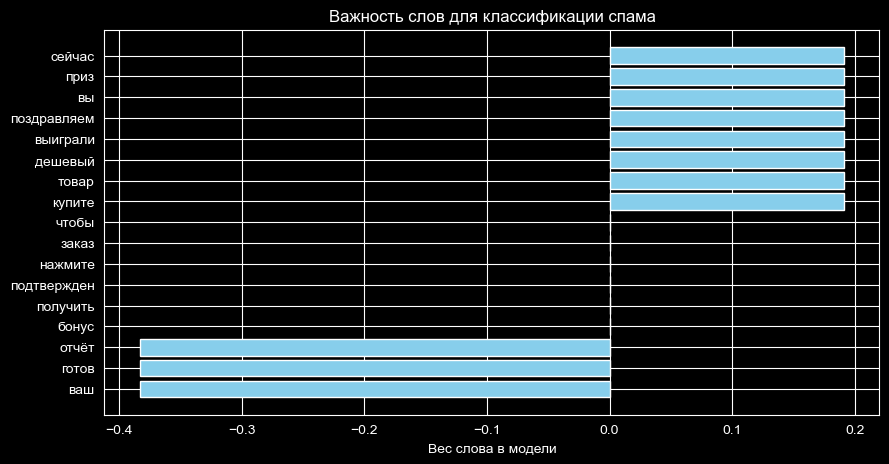

In [10]:
# 1⃣ Важность слов (коэффициенты логистической регрессии)
words = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
# Сортировка по важности
sorted_indices = coefficients.argsort()[::-1]
sorted_words = [words[i] for i in sorted_indices]
sorted_coeffs = coefficients[sorted_indices]
plt.figure(figsize=(10, 5))
plt.barh(sorted_words, sorted_coeffs, color='skyblue')
plt.xlabel('Вес слова в модели')
plt.title('Важность слов для классификации спама')
plt.gca().invert_yaxis()
plt.show()

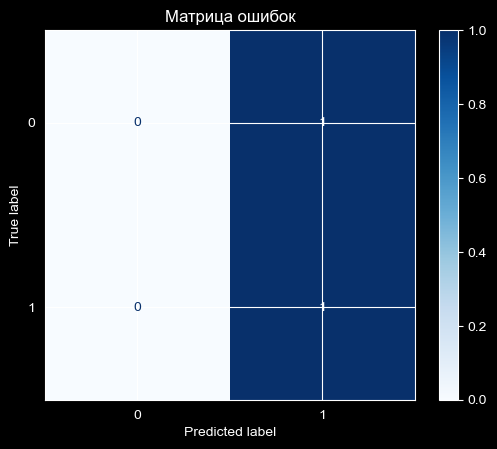

In [11]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Матрица ошибок")
plt.show()